In [2]:
!pip install tensorflow


   ---------------------------------------- 0.0/331.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/331.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/331.9 MB 1.5 MB/s eta 0:03:38
   ---------------------------------------- 0.8/331.9 MB 2.0 MB/s eta 0:02:48
   ---------------------------------------- 1.3/331.9 MB 1.9 MB/s eta 0:02:53
   ---------------------------------------- 1.6/331.9 MB 1.8 MB/s eta 0:03:05
   ---------------------------------------- 2.1/331.9 MB 1.9 MB/s eta 0:02:57
   ---------------------------------------- 2.6/331.9 MB 1.9 MB/s eta 0:02:55
   ---------------------------------------- 3.1/331.9 MB 2.0 MB/s eta 0:02:48
   ---------------------------------------- 3.7/331.9 MB 2.0 MB/s eta 0:02:48
   ---------------------------------------- 3.9/331.9 MB 2.0 MB/s eta 0:02:48
    --------------------------------------- 4.5/331.9 MB 2.0 MB/s eta 0:02:48
    --------------------------------------- 5.0/331.9 MB 2.0 MB/s eta 0:02:42


In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [5]:
# Load dataset

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [7]:
# Normalize (scale pixel values to 0–1)
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Reshape to (samples, 28, 28, 1) for CNNs
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

# One-hot encode labels (0–9 classes)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

X_train.shape, y_train.shape


((60000, 28, 28, 1), (60000, 10))

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')   # 10 output classes
])

model.summary()


C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.1
)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 62s 29ms/step - accuracy: 0.9584 - loss: 0.1395 - val_accuracy: 0.9870 - val_loss: 0.0481
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.9861 - loss: 0.0441 - val_accuracy: 0.9845 - val_loss: 0.0462
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - accuracy: 0.9908 - loss: 0.0299 - val_accuracy: 0.9900 - val_loss: 0.0335
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 47s 28ms/step - accuracy: 0.9936 - loss: 0.0204 - val_accuracy: 0.9888 - val_loss: 0.0404
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 54s 32ms/step - accuracy: 0.9949 - loss: 0.0161 - val_accuracy: 0.9898 - val_loss: 0.0355


In [10]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9909 - loss: 0.0314
Test accuracy: 0.9908999800682068


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step


(-0.5, 27.5, 27.5, -0.5)

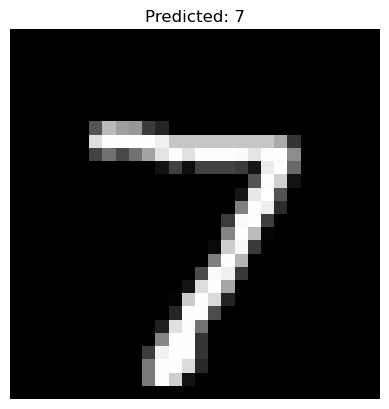

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Select one image
index = 0
image = X_test[index]

# Model prediction
prediction = model.predict(image.reshape(1,28,28,1))
predicted_class = np.argmax(prediction)

plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


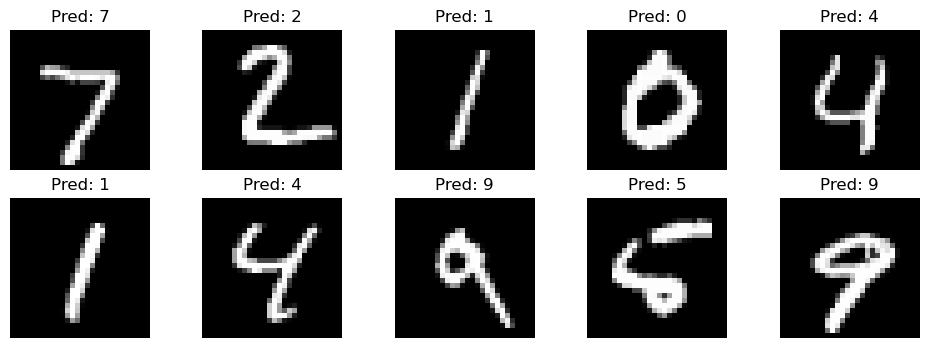

In [12]:
plt.figure(figsize=(12,4))

for i in range(10):
    image = X_test[i]
    pred = model.predict(image.reshape(1,28,28,1))
    label = np.argmax(pred)

    plt.subplot(2,5,i+1)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f"Pred: {label}")
    plt.axis('off')

plt.show()


In [14]:
# Save the trained model in modern Keras format
model.save("mnist_cnn_model.keras")
print("Model saved successfully!")


Model saved successfully!
